## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Define paths
BASE_DIR = Path().absolute().parent  # notebooks -> vinushan module
DATA_DIR = BASE_DIR / 'data'
PROCESSED_DIR = DATA_DIR / 'processed'

# Create processed directory if not exists
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Input file path
RAW_DATA_PATH = DATA_DIR / 'the_rossmann_coffee_shop_sales_dataset.csv'

print(f"Base directory: {BASE_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Processed directory: {PROCESSED_DIR}")
print(f"Raw data path: {RAW_DATA_PATH}")
print(f"\nRaw data exists: {RAW_DATA_PATH.exists()}")

Base directory: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan
Data directory: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan/data
Processed directory: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan/data/processed
Raw data path: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan/data/the_rossmann_coffee_shop_sales_dataset.csv

Raw data exists: True


## 2. Load Raw Transactional Data

In [3]:
# Load raw transactional data
raw_df = pd.read_csv(RAW_DATA_PATH)

print(f"Raw Dataset Shape: {raw_df.shape}")
print(f"Total Transactions: {len(raw_df):,}")
print(f"\nColumns ({len(raw_df.columns)}):")
print(raw_df.columns.tolist())

Raw Dataset Shape: (20829, 25)
Total Transactions: 20,829

Columns (25):
['system_date', 'order_type', 'food_name', 'qty', 'gross_price', 'discount_rate', 'total_discount_price', 'total_price', 'discount_ratio_effective', 'day_of_week', 'is_weekend', 'month', 'year', 'is_month_start', 'is_month_end', 'week_of_month', 'is_holiday', 'holiday_name', 'is_pre_holiday', 'is_post_holiday', 'order_time', 'order_datetime', 'temp_avg', 'rain_mm', 'is_rainy']


In [4]:
# Preview the data
raw_df.head()

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,is_weekend,month,year,is_month_start,is_month_end,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49+05:30,27.6,0.0,0
1,2020-01-10,takeaway,Spicy Burger,2,1799.79,0.275847,663.90,1135.89,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,16:57:33,2020-01-10 16:57:33+05:30,28.9,0.0,0
2,2020-01-10,delivery,Deluxe Pizza 19,5,1159.29,0.248521,130.85,1028.44,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,12:25:37,2020-01-10 12:25:37+05:30,30.4,0.0,0
3,2020-01-10,delivery,Crispy Pasta 12,3,1760.22,0.028765,451.44,1308.78,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,09:26:25,2020-01-10 09:26:25+05:30,26.9,0.0,0
4,2020-01-10,delivery,Crispy Dessert 9,3,1063.20,0.007932,247.19,816.01,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,19:26:36,2020-01-10 19:26:36+05:30,27.6,0.0,0


In [5]:
# Data types and info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20829 entries, 0 to 20828
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system_date               20829 non-null  object 
 1   order_type                20829 non-null  object 
 2   food_name                 20829 non-null  object 
 3   qty                       20829 non-null  int64  
 4   gross_price               20829 non-null  float64
 5   discount_rate             20829 non-null  float64
 6   total_discount_price      20829 non-null  float64
 7   total_price               20829 non-null  float64
 8   discount_ratio_effective  2630 non-null   float64
 9   day_of_week               20829 non-null  int64  
 10  is_weekend                20829 non-null  int64  
 11  month                     20829 non-null  int64  
 12  year                      20829 non-null  int64  
 13  is_month_start            20829 non-null  int64  
 14  is_mon

In [6]:
# Check for missing values
missing = raw_df.isnull().sum()
missing_pct = (missing / len(raw_df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:
                          Missing Count  Missing %
discount_ratio_effective          18199      87.37
holiday_name                      15228      73.11


## 3. Parse Date and Initial Processing

In [7]:
# Parse system_date as date (ignore time component)
raw_df['date'] = pd.to_datetime(raw_df['system_date']).dt.date
raw_df['date'] = pd.to_datetime(raw_df['date'])

# Date range info
print(f"Date Range: {raw_df['date'].min()} to {raw_df['date'].max()}")
print(f"Total Days (with transactions): {raw_df['date'].nunique()}")
print(f"Expected Days (continuous): {(raw_df['date'].max() - raw_df['date'].min()).days + 1}")

Date Range: 2020-01-10 00:00:00 to 2025-09-10 00:00:00
Total Days (with transactions): 2046
Expected Days (continuous): 2071


In [8]:
# Check for any duplicates or issues
print(f"Unique Dates with Data: {raw_df['date'].nunique()}")
print(f"Total Transactions: {len(raw_df)}")
print(f"Average Transactions per Day: {len(raw_df) / raw_df['date'].nunique():.1f}")

Unique Dates with Data: 2046
Total Transactions: 20829
Average Transactions per Day: 10.2


## 4. Aggregate to Daily Level

In [9]:
# Define aggregation functions
agg_dict = {
    # Primary target: total quantity sold
    'qty': 'sum',
    # Secondary target: total revenue
    'total_price': 'sum',
    # Weather features (mean for the day)
    'temp_avg': 'mean',
    'rain_mm': 'mean',
    'is_rainy': 'max',
    # Calendar features (max = if any transaction has flag)
    'is_weekend': 'max',
    'is_holiday': 'max',
    'is_pre_holiday': 'max',
    'is_post_holiday': 'max',
    'day_of_week': 'first',  # Same for all transactions on same day
    # Holiday name for label
    'holiday_name': lambda x: x.dropna().mode().iloc[0] if len(x.dropna().mode()) > 0 else ''
}

# Aggregate by date
daily_df = raw_df.groupby('date').agg(agg_dict).reset_index()

# Rename columns for clarity
daily_df = daily_df.rename(columns={
    'qty': 'y_qty',
    'total_price': 'y_revenue',
    'holiday_name': 'holiday_label'
})

print(f"Daily Dataset Shape: {daily_df.shape}")
daily_df.head(10)

Daily Dataset Shape: (2046, 12)


,date,y_qty,y_revenue,temp_avg,rain_mm,is_rainy,is_weekend,is_holiday,is_pre_holiday,is_post_holiday,day_of_week,holiday_label
0,2020-01-10,81,55404.62,28.540625,0.000000,0,0,1,0,0,4,Duruthu Full Moon Poya Day
1,2020-01-11,101,60045.70,28.363889,0.000000,0,1,0,0,1,5,
2,2020-01-12,5,2762.26,26.350000,0.000000,0,1,0,0,0,6,
3,2020-01-13,17,16629.53,28.250000,0.000000,0,0,0,0,0,0,
4,2020-01-14,98,68325.09,27.300000,0.000000,0,0,0,1,0,1,
5,2020-01-15,92,53825.96,27.758065,0.000000,0,0,1,0,0,2,Tamil Thai Pongal Day
6,2020-01-16,99,55771.19,27.647222,0.000000,0,0,0,0,1,3,
7,2020-01-17,9,7547.79,29.425000,0.000000,0,0,0,0,0,4,
8,2020-01-18,5,1522.98,30.200000,0.200000,1,1,0,0,0,5,
9,2020-01-19,8,4330.79,26.833333,0.166667,1,1,0,0,0,6,


In [10]:
# Summary statistics for daily data
print("Daily Aggregated Statistics:")
daily_df[['y_qty', 'y_revenue', 'temp_avg', 'rain_mm']].describe()

Daily Aggregated Statistics:


,y_qty,y_revenue,temp_avg,rain_mm
count,2046.000000,2046.000000,2046.000000,2046.000000
mean,25.557185,17054.488167,27.735947,0.307297
std,33.682168,23533.477628,1.373538,0.686489
min,1.000000,64.810000,23.888235,0.000000
25%,6.000000,3248.215000,26.820000,0.000000
50%,10.000000,6759.545000,27.666667,0.085165
75%,20.000000,14383.742500,28.600000,0.275000
max,136.000000,184375.180000,35.500000,12.400000


## 5. Ensure Date Continuity (Fill Missing Dates)

In [11]:
# Create complete date range
min_date = daily_df['date'].min()
max_date = daily_df['date'].max()

full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')
full_dates_df = pd.DataFrame({'date': full_date_range})

# Find missing dates
existing_dates = set(daily_df['date'])
all_dates = set(full_dates_df['date'])
missing_dates = all_dates - existing_dates

print(f"Total expected days: {len(full_date_range)}")
print(f"Days with transactions: {len(daily_df)}")
print(f"Missing days: {len(missing_dates)}")

if len(missing_dates) > 0:
    print(f"\nFirst 10 missing dates:")
    print(sorted(list(missing_dates))[:10])

Total expected days: 2071
Days with transactions: 2046
Missing days: 25

First 10 missing dates:
[Timestamp('2025-01-05 00:00:00'), Timestamp('2025-01-09 00:00:00'), Timestamp('2025-01-29 00:00:00'), Timestamp('2025-01-30 00:00:00'), Timestamp('2025-01-31 00:00:00'), Timestamp('2025-02-28 00:00:00'), Timestamp('2025-03-15 00:00:00'), Timestamp('2025-03-17 00:00:00'), Timestamp('2025-03-29 00:00:00'), Timestamp('2025-03-30 00:00:00')]


In [12]:
# Merge with full date range to ensure continuity
daily_ts = full_dates_df.merge(daily_df, on='date', how='left')

print(f"Shape after merge: {daily_ts.shape}")
print(f"Missing values before fill:")
print(daily_ts.isnull().sum())

Shape after merge: (2071, 12)
Missing values before fill:
date                0
y_qty              25
y_revenue          25
temp_avg           25
rain_mm            25
is_rainy           25
is_weekend         25
is_holiday         25
is_pre_holiday     25
is_post_holiday    25
day_of_week        25
holiday_label      25
dtype: int64


In [13]:
# Fill missing values appropriately

# Target variables: 0 for missing dates (no sales)
daily_ts['y_qty'] = daily_ts['y_qty'].fillna(0).astype(int)
daily_ts['y_revenue'] = daily_ts['y_revenue'].fillna(0.0)

# Holiday flags: 0 for missing dates
daily_ts['is_holiday'] = daily_ts['is_holiday'].fillna(0).astype(int)
daily_ts['is_pre_holiday'] = daily_ts['is_pre_holiday'].fillna(0).astype(int)
daily_ts['is_post_holiday'] = daily_ts['is_post_holiday'].fillna(0).astype(int)
daily_ts['is_rainy'] = daily_ts['is_rainy'].fillna(0).astype(int)

# Recompute is_weekend and day_of_week from date
daily_ts['day_of_week'] = daily_ts['date'].dt.dayofweek  # 0=Monday, 6=Sunday
daily_ts['is_weekend'] = (daily_ts['day_of_week'] >= 5).astype(int)

# Holiday label: empty string for missing
daily_ts['holiday_label'] = daily_ts['holiday_label'].fillna('')

# Weather: forward-fill, then rolling mean fallback
daily_ts['temp_avg'] = daily_ts['temp_avg'].ffill()
daily_ts['rain_mm'] = daily_ts['rain_mm'].ffill()

# For any remaining NaN (at the beginning), use rolling mean or overall mean
if daily_ts['temp_avg'].isnull().any():
    daily_ts['temp_avg'] = daily_ts['temp_avg'].bfill()
if daily_ts['rain_mm'].isnull().any():
    daily_ts['rain_mm'] = daily_ts['rain_mm'].bfill()

# Final check
print("Missing values after fill:")
print(daily_ts.isnull().sum())

Missing values after fill:
date               0
y_qty              0
y_revenue          0
temp_avg           0
rain_mm            0
is_rainy           0
is_weekend         0
is_holiday         0
is_pre_holiday     0
is_post_holiday    0
day_of_week        0
holiday_label      0
dtype: int64


In [14]:
# Add additional date features
daily_ts['month'] = daily_ts['date'].dt.month
daily_ts['year'] = daily_ts['date'].dt.year
daily_ts['day'] = daily_ts['date'].dt.day
daily_ts['week_of_year'] = daily_ts['date'].dt.isocalendar().week.astype(int)
daily_ts['quarter'] = daily_ts['date'].dt.quarter

# Rename date to 'ds' for Prophet compatibility
daily_ts = daily_ts.rename(columns={'date': 'ds'})

print("Final columns:")
print(daily_ts.columns.tolist())
print(f"\nFinal shape: {daily_ts.shape}")

Final columns:
['ds', 'y_qty', 'y_revenue', 'temp_avg', 'rain_mm', 'is_rainy', 'is_weekend', 'is_holiday', 'is_pre_holiday', 'is_post_holiday', 'day_of_week', 'holiday_label', 'month', 'year', 'day', 'week_of_year', 'quarter']

Final shape: (2071, 17)


In [15]:
# Preview final dataset
daily_ts.head(10)

,ds,y_qty,y_revenue,temp_avg,rain_mm,is_rainy,is_weekend,is_holiday,is_pre_holiday,is_post_holiday,day_of_week,holiday_label,month,year,day,week_of_year,quarter
0,2020-01-10,81,55404.62,28.540625,0.000000,0,0,1,0,0,4,Duruthu Full Moon Poya Day,1,2020,10,2,1
1,2020-01-11,101,60045.70,28.363889,0.000000,0,1,0,0,1,5,,1,2020,11,2,1
2,2020-01-12,5,2762.26,26.350000,0.000000,0,1,0,0,0,6,,1,2020,12,2,1
3,2020-01-13,17,16629.53,28.250000,0.000000,0,0,0,0,0,0,,1,2020,13,3,1
4,2020-01-14,98,68325.09,27.300000,0.000000,0,0,0,1,0,1,,1,2020,14,3,1
5,2020-01-15,92,53825.96,27.758065,0.000000,0,0,1,0,0,2,Tamil Thai Pongal Day,1,2020,15,3,1
6,2020-01-16,99,55771.19,27.647222,0.000000,0,0,0,0,1,3,,1,2020,16,3,1
7,2020-01-17,9,7547.79,29.425000,0.000000,0,0,0,0,0,4,,1,2020,17,3,1
8,2020-01-18,5,1522.98,30.200000,0.200000,1,1,0,0,0,5,,1,2020,18,3,1
9,2020-01-19,8,4330.79,26.833333,0.166667,1,1,0,0,0,6,,1,2020,19,3,1


In [16]:
# Final statistics
print("=" * 60)
print("DAILY TIME SERIES DATASET SUMMARY")
print("=" * 60)
print(f"\nDate Range: {daily_ts['ds'].min().date()} to {daily_ts['ds'].max().date()}")
print(f"Total Days: {len(daily_ts)}")
print(f"Days with Sales: {(daily_ts['y_qty'] > 0).sum()}")
print(f"Days without Sales: {(daily_ts['y_qty'] == 0).sum()}")
print(f"\nTarget Variable (y_qty) Statistics:")
print(f"  Mean: {daily_ts['y_qty'].mean():.2f}")
print(f"  Std: {daily_ts['y_qty'].std():.2f}")
print(f"  Min: {daily_ts['y_qty'].min()}")
print(f"  Max: {daily_ts['y_qty'].max()}")
print(f"  Total: {daily_ts['y_qty'].sum():,}")
print(f"\nHoliday Days: {(daily_ts['is_holiday'] == 1).sum()}")
print(f"Weekend Days: {(daily_ts['is_weekend'] == 1).sum()}")
print(f"Rainy Days: {(daily_ts['is_rainy'] == 1).sum()}")

DAILY TIME SERIES DATASET SUMMARY

Date Range: 2020-01-10 to 2025-09-10
Total Days: 2071
Days with Sales: 2046
Days without Sales: 25

Target Variable (y_qty) Statistics:
  Mean: 25.25
  Std: 33.59
  Min: 0
  Max: 136
  Total: 52,290

Holiday Days: 153
Weekend Days: 592
Rainy Days: 1453


## 6. Create Prophet Holidays Dataset

In [17]:
# Extract unique holidays for Prophet
holidays_df = daily_ts[daily_ts['is_holiday'] == 1][['ds', 'holiday_label']].copy()
holidays_df = holidays_df[holidays_df['holiday_label'] != '']

# Rename for Prophet format
holidays_df = holidays_df.rename(columns={'holiday_label': 'holiday'})

# Add Prophet required columns
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 0

# Reorder columns
holidays_df = holidays_df[['holiday', 'ds', 'lower_window', 'upper_window']]

print(f"Prophet Holidays Dataset Shape: {holidays_df.shape}")
print(f"\nUnique Holidays ({holidays_df['holiday'].nunique()}):")
print(holidays_df['holiday'].value_counts())

Prophet Holidays Dataset Shape: (153, 4)

Unique Holidays (29):
holiday
Special Public Holiday                        9
Duruthu Full Moon Poya Day                    6
Vesak Full Moon Poya Day                      6
Binara Full Moon Poya Day                     6
Nikini Full Moon Poya Day                     6
Eid al-Adha                                   6
Esala Full Moon Poya Day                      6
Poson Full Moon Poya Day                      6
Tamil Thai Pongal Day                         6
Day Following Vesak Full Moon Poya Day        6
International Workers' Day                    6
Sinhala and Tamil New Year                    6
Day Before Sinhala and Tamil New Year         6
Good Friday                                   6
Bak Full Moon Poya Day                        6
Medin Full Moon Poya Day                      6
Maha Sivarathri Day                           6
Nawam Full Moon Poya Day                      6
Independence Day                              6
Il Full Moon Poy

In [18]:
# Preview holidays
holidays_df.head(20)

,holiday,ds,lower_window,upper_window
0,Duruthu Full Moon Poya Day,2020-01-10,0,0
5,Tamil Thai Pongal Day,2020-01-15,0,0
25,Independence Day,2020-02-04,0,0
29,Nawam Full Moon Poya Day,2020-02-08,0,0
42,Maha Sivarathri Day,2020-02-21,0,0
59,Medin Full Moon Poya Day,2020-03-09,0,0
66,Special Public Holiday,2020-03-16,0,0
67,Special Public Holiday,2020-03-17,0,0
68,Special Public Holiday,2020-03-18,0,0
69,Special Public Holiday,2020-03-19,0,0


## 7. Visualization: y_qty Over Time

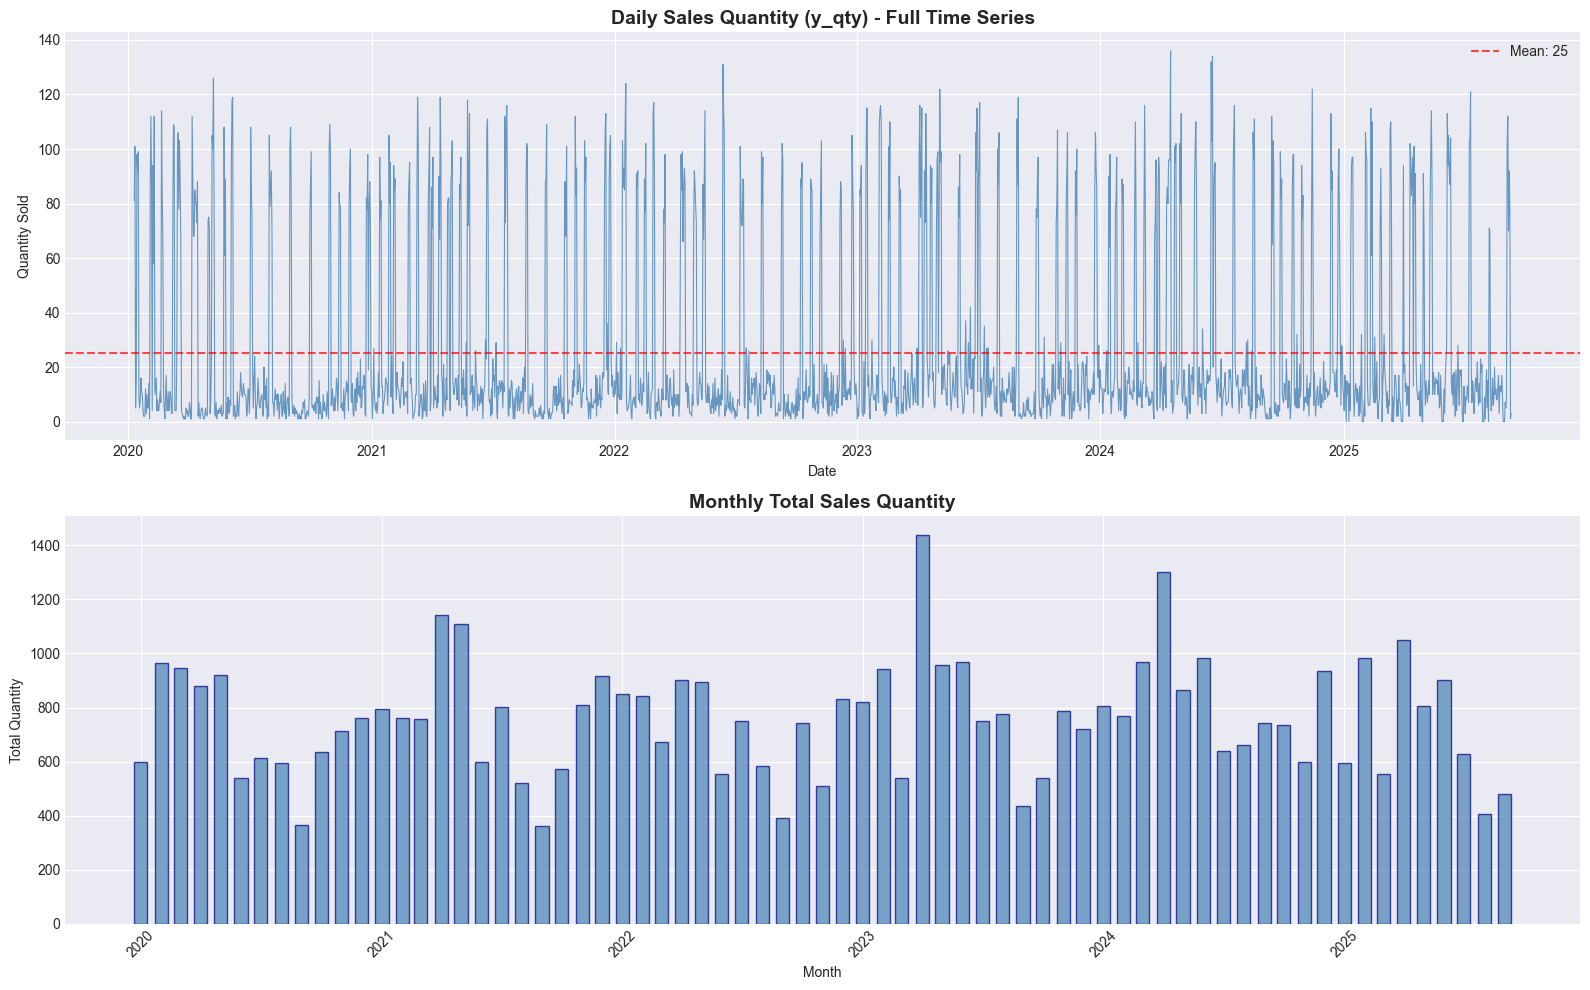

In [19]:
# Plot daily quantity over time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full time series
ax1 = axes[0]
ax1.plot(daily_ts['ds'], daily_ts['y_qty'], linewidth=0.8, alpha=0.8, color='steelblue')
ax1.set_title('Daily Sales Quantity (y_qty) - Full Time Series', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Sold')
ax1.axhline(y=daily_ts['y_qty'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {daily_ts["y_qty"].mean():.0f}')
ax1.legend()

# Monthly aggregation
ax2 = axes[1]
monthly = daily_ts.groupby(daily_ts['ds'].dt.to_period('M'))['y_qty'].sum()
monthly.index = monthly.index.to_timestamp()
ax2.bar(monthly.index, monthly.values, width=20, color='steelblue', alpha=0.7, edgecolor='navy')
ax2.set_title('Monthly Total Sales Quantity', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Quantity')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

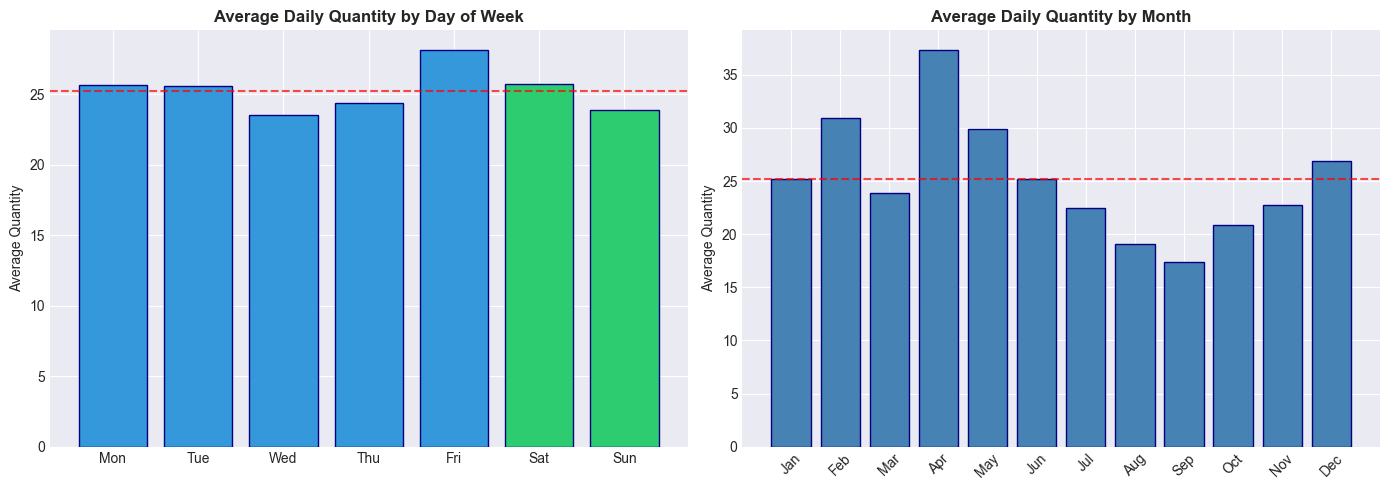

In [20]:
# Weekly pattern analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_avg = daily_ts.groupby('day_of_week')['y_qty'].mean()

ax1 = axes[0]
colors = ['#2ecc71' if i >= 5 else '#3498db' for i in range(7)]
ax1.bar(day_names, dow_avg.values, color=colors, edgecolor='navy')
ax1.set_title('Average Daily Quantity by Day of Week', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Quantity')
ax1.axhline(y=dow_avg.mean(), color='red', linestyle='--', alpha=0.7)

# By month
month_avg = daily_ts.groupby('month')['y_qty'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax2 = axes[1]
ax2.bar(month_names, month_avg.values, color='steelblue', edgecolor='navy')
ax2.set_title('Average Daily Quantity by Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Quantity')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=month_avg.mean(), color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

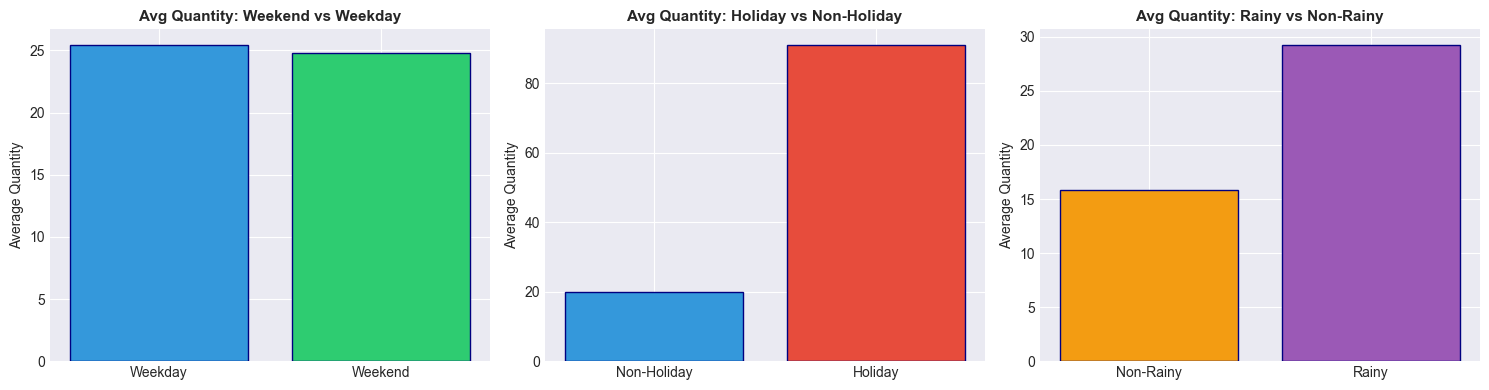

In [21]:
# Holiday and Weekend impact
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Weekend vs Weekday
weekend_compare = daily_ts.groupby('is_weekend')['y_qty'].mean()
ax1 = axes[0]
ax1.bar(['Weekday', 'Weekend'], weekend_compare.values, color=['#3498db', '#2ecc71'], edgecolor='navy')
ax1.set_title('Avg Quantity: Weekend vs Weekday', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Quantity')

# Holiday vs Non-Holiday
holiday_compare = daily_ts.groupby('is_holiday')['y_qty'].mean()
ax2 = axes[1]
ax2.bar(['Non-Holiday', 'Holiday'], holiday_compare.values, color=['#3498db', '#e74c3c'], edgecolor='navy')
ax2.set_title('Avg Quantity: Holiday vs Non-Holiday', fontsize=11, fontweight='bold')
ax2.set_ylabel('Average Quantity')

# Rainy vs Non-Rainy
rainy_compare = daily_ts.groupby('is_rainy')['y_qty'].mean()
ax3 = axes[2]
ax3.bar(['Non-Rainy', 'Rainy'], rainy_compare.values, color=['#f39c12', '#9b59b6'], edgecolor='navy')
ax3.set_title('Avg Quantity: Rainy vs Non-Rainy', fontsize=11, fontweight='bold')
ax3.set_ylabel('Average Quantity')

plt.tight_layout()
plt.show()

## 8. Save Processed Datasets

In [22]:
# Save daily time series dataset
daily_ts_path = PROCESSED_DIR / 'athena_daily_ts_dataset.csv'
daily_ts.to_csv(daily_ts_path, index=False)
print(f"✅ Saved: {daily_ts_path}")

# Save Prophet holidays
holidays_path = PROCESSED_DIR / 'prophet_holidays.csv'
holidays_df.to_csv(holidays_path, index=False)
print(f"✅ Saved: {holidays_path}")

✅ Saved: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan/data/processed/athena_daily_ts_dataset.csv
✅ Saved: /Users/vinushan/Documents/Y4S2/RP module/rp-project/backend/app/modules/vinushan/data/processed/prophet_holidays.csv


In [23]:
# Verify saved files
print("\n" + "=" * 60)
print("FILE VERIFICATION")
print("=" * 60)

# Daily TS dataset
if daily_ts_path.exists():
    loaded_ts = pd.read_csv(daily_ts_path)
    print(f"\n📁 athena_daily_ts_dataset.csv")
    print(f"   Shape: {loaded_ts.shape}")
    print(f"   Size: {daily_ts_path.stat().st_size / 1024:.2f} KB")
    print(f"   Columns: {loaded_ts.columns.tolist()}")
else:
    print("❌ athena_daily_ts_dataset.csv NOT FOUND!")

# Prophet holidays
if holidays_path.exists():
    loaded_holidays = pd.read_csv(holidays_path)
    print(f"\n📁 prophet_holidays.csv")
    print(f"   Shape: {loaded_holidays.shape}")
    print(f"   Size: {holidays_path.stat().st_size / 1024:.2f} KB")
    print(f"   Columns: {loaded_holidays.columns.tolist()}")
else:
    print("❌ prophet_holidays.csv NOT FOUND!")


FILE VERIFICATION

📁 athena_daily_ts_dataset.csv
   Shape: (2071, 17)
   Size: 153.36 KB
   Columns: ['ds', 'y_qty', 'y_revenue', 'temp_avg', 'rain_mm', 'is_rainy', 'is_weekend', 'is_holiday', 'is_pre_holiday', 'is_post_holiday', 'day_of_week', 'holiday_label', 'month', 'year', 'day', 'week_of_year', 'quarter']

📁 prophet_holidays.csv
   Shape: (153, 4)
   Size: 5.82 KB
   Columns: ['holiday', 'ds', 'lower_window', 'upper_window']


## 9. Summary

### Dataset Created Successfully!

**Outputs:**
- `data/processed/athena_daily_ts_dataset.csv` - Daily aggregated time series
- `data/processed/prophet_holidays.csv` - Holiday calendar for Prophet

**Key Characteristics:**
- Continuous daily data (no gaps)
- Primary target: `y_qty` (daily quantity sold)
- Secondary target: `y_revenue` (daily revenue)
- Features: weather (temp_avg, rain_mm, is_rainy), calendar (is_weekend, day_of_week, is_holiday, is_pre_holiday, is_post_holiday)

**Ready for Model Training in Notebook 02!**

In [24]:
print("\n" + "=" * 60)
print("🎯 DATASET CREATION COMPLETE!")
print("=" * 60)
print(f"\nReady for model training in Notebook 02.")
print(f"\nNext steps:")
print(f"  1. Open 02_model_training_comparison.ipynb")
print(f"  2. Load athena_daily_ts_dataset.csv")
print(f"  3. Train Baseline, SARIMA, and Prophet models")
print(f"  4. Compare performance and select best model")


🎯 DATASET CREATION COMPLETE!

Ready for model training in Notebook 02.

Next steps:
  1. Open 02_model_training_comparison.ipynb
  2. Load athena_daily_ts_dataset.csv
  3. Train Baseline, SARIMA, and Prophet models
  4. Compare performance and select best model
